# Exercises
## Exercise 1
1) What's the problem with random networks as a model for real-world networks according to the argument in section 3.5 (near the end)?

- The significant deviation between the data and the Poisson fit indicates that the random network model underestimates the size and the frequency of the high degree nodes, as well as the number of low degree nodes.

2) List the four regimes that characterize random networks as a function of ⟨k⟩.

- ⟨k⟩ < 1 (subcritical), ⟨k⟩ = 1 (critical), ⟨k⟩ > 1 (supercritical), ⟨k⟩ > lnN (connected)  

3) According to the book, why is it a problem for random networks (in terms of being a model for real-world networks) that the degree-dependent clustering C(k) decreases as a function of k in real-world networks?
- The problem is that the random networks predict disconnectedness for real networks that certainly is not. 

In [2]:
import networkx as nx
import urllib2
import json
import matplotlib.pyplot as plt
import scipy as sc
import numpy as np
from __future__ import division
import random

In [3]:
G = nx.watts_strogatz_graph(500,4,0)
H = nx.watts_strogatz_graph(500,4,0.1)
I = nx.watts_strogatz_graph(500,4,1)

In [4]:
nx.average_shortest_path_length(G)

62.875751503006015

In [5]:
nx.average_shortest_path_length(H)

7.8107334669338675

In [6]:
nx.average_shortest_path_length(I)

4.753330661322646

Index 0 of 0.000 is done
Index 10 of 0.000 is done
Index 20 of 0.000 is done
Index 30 of 0.000 is done
Index 40 of 0.000 is done
0
Index 0 of 0.010 is done
Index 10 of 0.010 is done
Index 20 of 0.010 is done
Index 30 of 0.010 is done
Index 40 of 0.010 is done
0.01
Index 0 of 0.030 is done
Index 10 of 0.030 is done
Index 20 of 0.030 is done
Index 30 of 0.030 is done
Index 40 of 0.030 is done
0.03
Index 0 of 0.050 is done
Index 10 of 0.050 is done
Index 20 of 0.050 is done
Index 30 of 0.050 is done
Index 40 of 0.050 is done
0.05
Index 0 of 0.100 is done
Index 10 of 0.100 is done
Index 20 of 0.100 is done
Index 30 of 0.100 is done
Index 40 of 0.100 is done
0.1
Index 0 of 0.200 is done
Index 10 of 0.200 is done
Index 20 of 0.200 is done
Index 30 of 0.200 is done
Index 40 of 0.200 is done
0.2


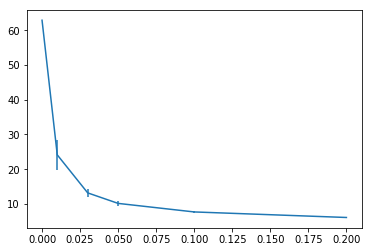

In [7]:
ps = [0,0.01,0.03,0.05,0.1,0.2]
means = []
stds = []
for p in ps:
    dists = []
    for i in range(50):
        G = nx.watts_strogatz_graph(500,4,p)
        dists.append(nx.average_shortest_path_length(G))
        if i%10==0:
            print("Index %d of %.3f is done" %(i,p))
    means.append(np.mean(dists))
    stds.append(np.std(dists))
    print(p)
plt.errorbar(ps,means,yerr=stds)
plt.show()

## Exercise 2
1) What are the three slope dependent regimes of complex networks with power-law degree distributions? Briefly describe each one. (You will have to skim chp 5.7 to answer this one).
- Anomalious ($\gamma = 2$) with linear growth compared to system size and no moments
- Scale-free ($ 2 <\gamma < 3$) with ln(ln(N)) growth compared to system size and no second moment
- Random ($\gamma > 3$) with ln(N) growth compared to system size and all moments. 

2) What are the three regimes we find in non-linear preferential attachement? (chapter 5) Briefly describe each one.
- Sublinear ($\alpha < 1$) where the degree distribution follows the stretched exponential resulting in fewer and smaller hubs than in a scale-free network
- Linear ($\alpha = 1$) which corresponds to the Barabási-Albert model, hence the degree distribution follows a power law.
- Superlinear Regime ($\alpha > 1$) where the earliest nodes become super hubs and all subsequent nodes link to them

In [61]:
G = nx.Graph()
G.add_node(1)
G.add_edge(1,1)

In [62]:
for i in range(2,101):
    G.add_node(i)
    choicelist = np.append(np.ndarray.flatten(np.array(list(G.edges))),i)
    G.add_edge(random.choice(choicelist),i)

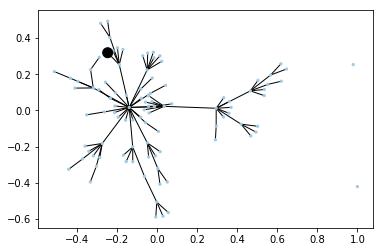

In [63]:
main_component=list(list(nx.connected_component_subgraphs(G))[0])
choice=random.choice(main_component)
newlist = ["#A0CBE2" for i in range(len(list(G.nodes())))]
newlist2 = [5 for i in range(len(list(G.nodes())))]
newlist[choice] = "#000000"
newlist2[choice] = 100
nx.draw_networkx(G,edgelist=G.edges(),node_size=newlist2,with_labels=False,node_color=newlist)
plt.show()

In [120]:
G = nx.Graph()
G.add_node(1)
G.add_edge(1,1)
for i in range(2,5001):
    G.add_node(i)
    choicelist = np.append(np.ndarray.flatten(np.array(list(G.edges))),i)
    G.add_edge(random.choice(choicelist),i)

In [121]:
graph_dict = dict(G.degree)

In [122]:
max(graph_dict.values())

259

In [123]:
min(graph_dict.values())

1

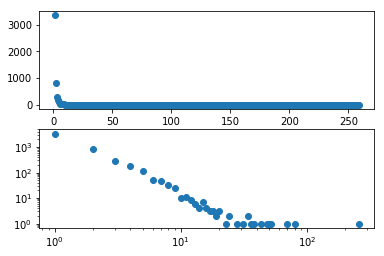

In [124]:
itera = list(range(min(graph_dict.values())-1,max(graph_dict.values())+1))
newitera = [x+0.5 for x in itera]
hist = np.histogram(graph_dict.values(),bins=newitera)
plt.subplot(211)
plt.scatter(list(range(min(graph_dict.values()),max(graph_dict.values())+1)),hist[0])
plt.subplot(212)
plt.loglog(list(range(min(graph_dict.values()),max(graph_dict.values())+1)),hist[0],'o')
plt.show()

In [125]:
choice = random.choice(list(G.nodes))

In [126]:
G.degree(choice)

1

In [127]:
list(G.neighbors(choice))

[100]

In [128]:
nx.average_neighbor_degree(G,nodes=[choice])[choice]

5.0

In [129]:
countT = 0
for i in range(1000):
    choice = random.choice(list(G.nodes))
    degree = G.degree(choice)
    avgdegree = nx.average_neighbor_degree(G,nodes=[choice])[choice]
    if avgdegree > degree:
        countT +=1
print countT

870


In [130]:
H = nx.erdos_renyi_graph(5000,2/(5000-1))

259
259


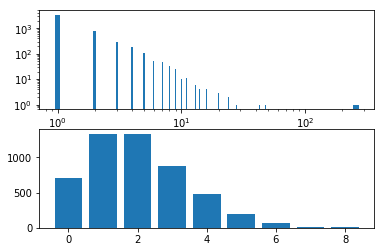

In [195]:
degree_sequence = [d for n, d in H.degree()]  # degree sequence
itera = list(range(min(degree_sequence)-1,max(degree_sequence)+1))
newitera = [x+0.5 for x in itera]
hist1 = np.histogram(degree_sequence,bins=newitera)
itera = list(range(min(graph_dict.values())-1,max(graph_dict.values())+1))
newitera = [x+0.5 for x in itera]
hist2 = np.histogram(graph_dict.values(),bins=newitera)
print len(hist2[0])
print len(list(range(min(graph_dict.values()),max(graph_dict.values())+1)))
plt.subplot(211)
width_spacing = np.diff(np.logspace(np.log(min(graph_dict.values())),np.log(max(graph_dict.values())),260,base=np.exp(1)))*5
plt.bar(list(range(min(graph_dict.values()),max(graph_dict.values())+1)),hist2[0],align="center",width=width_spacing,log=True)
plt.xscale("log")
plt.subplot(212)
plt.bar(list(range(min(degree_sequence),max(degree_sequence)+1)),hist1[0],align="center")
plt.show()

In [132]:
nx.number_connected_components(G)

8

In [133]:
nx.number_connected_components(H)

836

In [134]:
[len(c) for c in sorted(nx.connected_components(G), key=len, reverse=True)]

[4614, 258, 58, 56, 5, 4, 4, 1]

In [135]:
[len(c) for c in sorted(nx.connected_components(H), key=len, reverse=True)]

[3980,
 6,
 6,
 5,
 5,
 5,
 4,
 4,
 4,
 4,
 4,
 3,
 3,
 3,
 3,
 3,
 3,
 3,
 3,
 3,
 3,
 3,
 3,
 3,
 3,
 3,
 3,
 3,
 3,
 3,
 3,
 3,
 3,
 3,
 3,
 3,
 3,
 3,
 3,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 